# **Email Spam Detection**
using Naive Bayes Algorithm

**Importing Libraries and Dataset**

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("spam.csv" ,encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**Data Pre-Processing**

In [83]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [85]:
df.dropna(axis=1,inplace=True)

In [86]:
df.shape

(5572, 2)

In [87]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [88]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [92]:
df=df[df.columns[::-1]]

In [93]:
df.head()

,message,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


**Data Visualization**

In [94]:
print(df["target"].value_counts())

ham     4825
spam     747
Name: target, dtype: int64


<Axes: ylabel='target'>

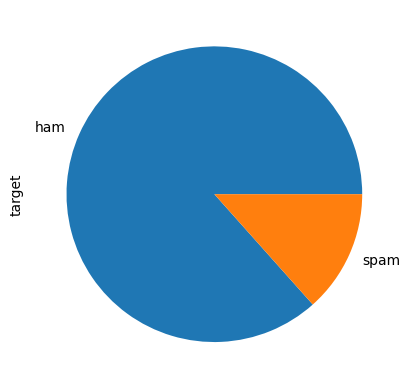

In [100]:
df.target.value_counts().plot(kind="pie")

**Splitting The Data into Training And Testing Dataset**

In [101]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### **Training the Dataset using Naive Bayes Classifier**

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features1 = vectorizer.fit_transform(X_train.message)

dfv1 = pd.DataFrame(
    data=features1.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=X_train.message,
)
dfv1

,00,000,000pes,008704050406,0089,0121,0125698789,02,0207,02072069400,...,ìï,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
message,,,,,,,,,,,,,,,,,,,,,
U can call now...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tell them u have a headache and just want to use 1 hour of sick time.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Never try alone to take the weight of a tear that comes out of ur heart and falls through ur eyes... Always remember a STUPID FRIEND is here to share... BSLVYL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Raji..pls do me a favour. Pls convey my Birthday wishes to Nimya. Pls. Today is her birthday.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
What time. IÛ÷m out until prob 3 or so,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I came hostel. I m going to sleep. Plz call me up before class. Hrishi.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Sorry, I'll call later",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Prabha..i'm soryda..realy..frm heart i'm sory,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(features1, y_train)

MultinomialNB()

### **Prediction**

In [105]:
prediction = classifier.predict(vectorizer.transform(X_test.message))

pd.DataFrame({'message':X_test.message,'is_spam':y_test, 'prediction':prediction})

,message,is_spam,prediction
3245,"Funny fact Nobody teaches volcanoes 2 erupt, t...",ham,ham
944,I sent my scores to sophas and i had to do sec...,ham,ham
1044,We know someone who you know that fancies you....,spam,spam
2484,Only if you promise your getting out as SOON a...,ham,ham
812,Congratulations ur awarded either å£500 of CD ...,spam,spam
...,...,...,...
668,Have a good evening! Ttyl,ham,ham
218,I have to take exam with march 3,ham,ham
5536,Aiyah ok wat as long as got improve can alread...,ham,ham
1657,S:-)if we have one good partnership going we w...,ham,ham


### **Accuracy**

In [106]:
from sklearn.metrics import accuracy_score
print ("The accuracy using Naive Bayes Classifier is", accuracy_score(y_test, prediction)*100,"%")

The accuracy using Logistic Regression Algorthim is 98.20531227566404 %


In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1199    3]
 [  22  169]]
